In [66]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

Download and prepare the MNIST dataset

In [109]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
print(train_images.shape)
print(train_labels.shape)
train_labels

(60000, 28, 28, 1)
(60000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Create Model

In [110]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [111]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


Add Dense layer on top

In [112]:
model.add(layers.Flatten())
model.add(tf.keras.layers.Dense(48, activation=tf.nn.leaky_relu))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [113]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 48)               

In [115]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=35)

Epoch 1/35
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0048 - accuracy: 0.9986
Epoch 2/35
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0064 - accuracy: 0.9983
Epoch 3/35
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0040 - accuracy: 0.9988
Epoch 4/35
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0043 - accuracy: 0.9988
Epoch 5/35
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0046 - accuracy: 0.9984
Epoch 6/35
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0031 - accuracy: 0.9990
Epoch 7/35
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0068 - accuracy: 0.9984
Epoch 8/35
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0032 - accuracy: 0.9991
Epoch 9/35
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0048 - accuracy: 0.99910s - loss:
Epoch 10/35
1875/1875 [==============================]

In [116]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0593 - accuracy: 0.9930


In [117]:
print(test_acc)

0.9929999709129333


TEST single image

In [79]:
image = (train_images[1]).reshape(1,28,28,1) # 1->'2';    
model_pred = model.predict_classes(image, verbose = 0)
print('Prediction of model: {}'.format(model_pred[0]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Prediction of model: 0


Testing multiple images

Test images shape: (4, 28, 28)
Predicted digit: 0
Predicted digit: 4
Predicted digit: 1
Predicted digit: 9


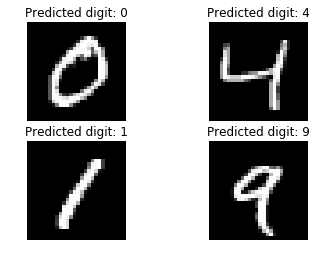

In [32]:

test_images = train_images[1:5]
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print ("Test images shape: {}".format(test_images.shape))

for i, test_image in enumerate(test_images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = model.predict_classes(test_image, verbose=0)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()

In [118]:
import numpy as np
import pandas as pd 
df1 = pd.read_csv("testdigit.csv")
Xtest=np.empty([len(df1),28,28,1])
Xtest1=np.empty([len(df1),28,28])
for i in range(len(df1)):
    Xtest[i]=df1.iloc[i,:].to_numpy().reshape(28,28,1)
    Xtest1[i]=df1.iloc[i,:].to_numpy().reshape(28,28)

In [119]:
Ytest= np.empty([len(df1),1])
Ytest= model.predict(Xtest)
df1.head()
Ytest.shape

(28000, 10)

[]

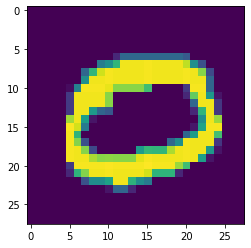

In [82]:
import matplotlib.pyplot as plt
plt.imshow(Xtest1[1])
plt.plot()

In [83]:
Ytest[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [120]:
df3 = pd.DataFrame(data =Ytest,columns=['0','1','2', '3', '4', '5', '6', '7', '8', '9'])
df3.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
def fun(r):
    if(r['0'] ==1):
        r['label']= 0
    elif (r['1'] ==1):
        r['label']= 1
    elif (r['2'] ==1):
        r['label']= 2
        
    elif (r['3'] ==1):
        r['label']= 3
        
    elif (r['4'] ==1):
        r['label']= 4
        
    elif (r['5'] ==1):
        r['label']= 5
    elif (r['6'] ==1):
        r['label']= 6
    elif (r['7'] ==1):
        r['label']= 7
    elif (r['8'] ==1):
        r['label']= 8
    elif (r['9'] ==1):
        r['label']= 9
    return r
df3=df3.apply(fun,axis=1)

In [122]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,label
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [123]:
df3=df3.drop(['1', '2', '3', '4', '5', '6', '7', '8', '9', '0'], axis=1)
df3.head()

,label
0,2.0
1,0.0
2,9.0
3,0.0
4,3.0


In [50]:
a=1

In [124]:
k= []
for i in range (len(df3)):
    k.append(i+1)

In [125]:
df3['ImageId']= k

In [126]:
df3.head()


,label,ImageId
0,2.0,1
1,0.0,2
2,9.0,3
3,0.0,4
4,3.0,5


In [127]:
df3.to_csv("Digit Recognised1.csv")